# North Atlantic

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
import xarray as xr
import numpy as np

from argopy import DataFetcher as ArgoDataFetcher
import gsw 

from datetime import datetime, timedelta
import pandas as pd
import os


import cartopy.crs as ccrs 
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import seaborn as sns

import pyxpcm
from pyxpcm.models import pcm

def get_prefix_filelist(path,  #''/home/jovyan/ohw20-proj-pyxpcm/data'
                 prefix='', #'summer'
                 sort=True
                 ):
    # Function to get a list of all files in the folder that start with a certain prefix.
    flist=[filename for filename in os.listdir(path) 
    if filename.startswith(prefix)]
    if sort:
        flist=sorted(flist) # Force it to be in the right order
    
    return flist

#import os.path
# def conditional_download(….):
#   if os.path.exists(…):
#     return xr.load_dataset(the_file_name)
#   ds = splice_argo_fetch(lat, lon, time, ….)
#   ds.to_netcdf(the_file_name.nc)
#   return ds

# warnings
import warnings
warnings.filterwarnings("ignore") # This suppress all warnings (not recommended!)

In [3]:
path='/home/jovyan/ohw20-proj-pyxpcm/data'
fname=get_prefix_filelist(path,prefix='summer')
fname
flist=[None]*len(fname)

for i,f in enumerate(fname):
    flist[i]=str(path)+'/'+str(f)
flist

['/home/jovyan/ohw20-proj-pyxpcm/data/summer2014.nc',
 '/home/jovyan/ohw20-proj-pyxpcm/data/summer2015.nc',
 '/home/jovyan/ohw20-proj-pyxpcm/data/summer2016.nc',
 '/home/jovyan/ohw20-proj-pyxpcm/data/summer2017.nc',
 '/home/jovyan/ohw20-proj-pyxpcm/data/summer2018.nc',
 '/home/jovyan/ohw20-proj-pyxpcm/data/summer2019.nc']

2014
We selected 2623 from 3598
<xarray.Dataset>
Dimensions:            (N_PROF: 2582, PRES_INTERPOLATED: 90)
Coordinates:
    TIME               (N_PROF) datetime64[ns] 2014-07-01T01:09:11 ... 2014-0...
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 0.0 5.0 10.0 ... 440.0 445.0
    LONGITUDE          (N_PROF) float64 -16.9 -0.454 -89.7 ... -43.3 -10.75
    LATITUDE           (N_PROF) float64 40.45 66.06 0.67 ... 53.09 34.61 68.96
  * N_PROF             (N_PROF) int64 324 583 264 269 24 196 ... 73 61 63 27 81
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 190.0 3.0 87.0 134.0 ... 80.0 39.0 41.0
    DATA_MODE          (N_PROF) object 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION          (N_PROF) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 6.9e+06 6.902e+06 ... 6.901e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float32 4.6 5.0 ... 445.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 35.85228 ... 34.90.

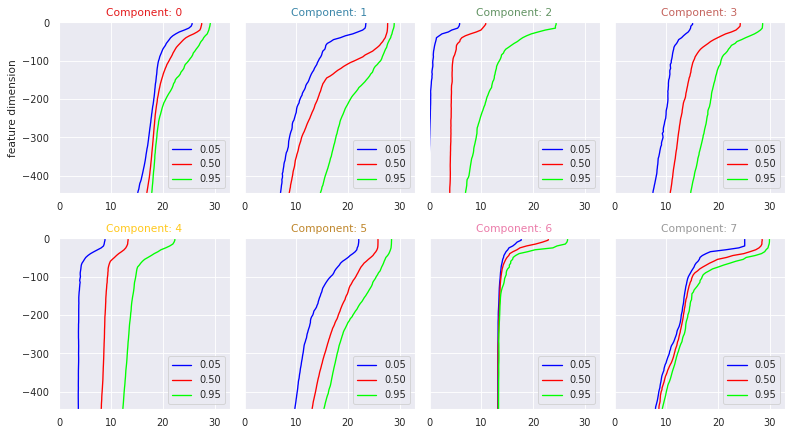

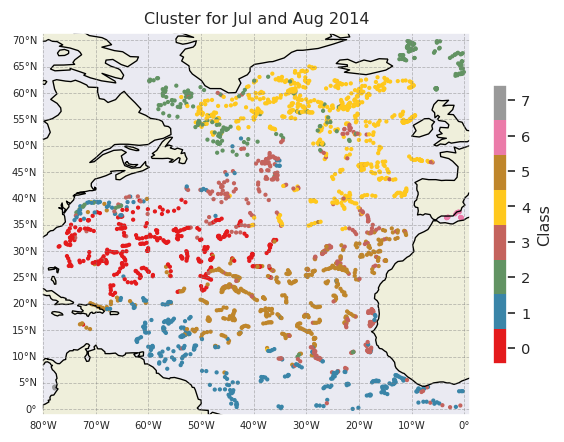

2015
We selected 2793 from 3846
<xarray.Dataset>
Dimensions:            (N_PROF: 2790, PRES_INTERPOLATED: 90)
Coordinates:
    TIME               (N_PROF) datetime64[ns] 2015-07-01T00:04:00 ... 2015-0...
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 0.0 5.0 10.0 ... 440.0 445.0
    LONGITUDE          (N_PROF) float64 -17.47 -53.35 -30.8 ... -40.62 -29.75
    LATITUDE           (N_PROF) float64 2.155 32.94 2.36 ... 61.81 61.06 54.87
  * N_PROF             (N_PROF) int64 555 143 361 479 141 5 ... 72 88 79 60 4 77
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 37.0 67.0 173.0 ... 116.0 151.0 46.0
    DATA_MODE          (N_PROF) object 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION          (N_PROF) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 6.902e+06 4.902e+06 ... 6.902e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float32 6.0 6.0 ... 445.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 34.98331 ... 34.9

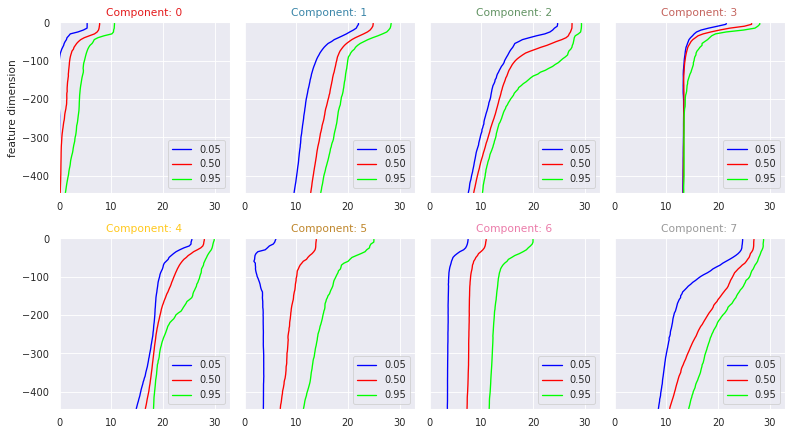

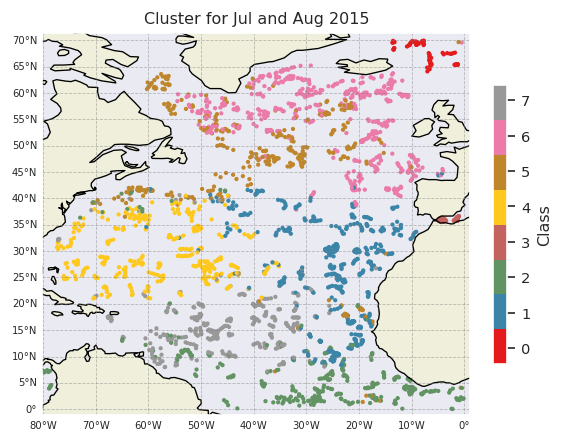

2016
We selected 2974 from 4521
<xarray.Dataset>
Dimensions:            (N_PROF: 2907, PRES_INTERPOLATED: 90)
Coordinates:
    TIME               (N_PROF) datetime64[ns] 2016-07-01T00:38:00 ... 2016-0...
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 0.0 5.0 10.0 ... 440.0 445.0
    LONGITUDE          (N_PROF) float64 -22.9 -3.543 -41.13 ... -34.14 -60.13
    LATITUDE           (N_PROF) float64 36.64 64.22 53.11 ... 59.64 60.03 20.59
  * N_PROF             (N_PROF) int64 506 673 455 384 500 253 ... 112 37 89 1 32
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 181.0 76.0 5.0 ... 152.0 185.0 133.0
    DATA_MODE          (N_PROF) object 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION          (N_PROF) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 6.901e+06 6.902e+06 ... 4.901e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float32 6.0 6.0 ... 445.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 36.251 ... 36.10

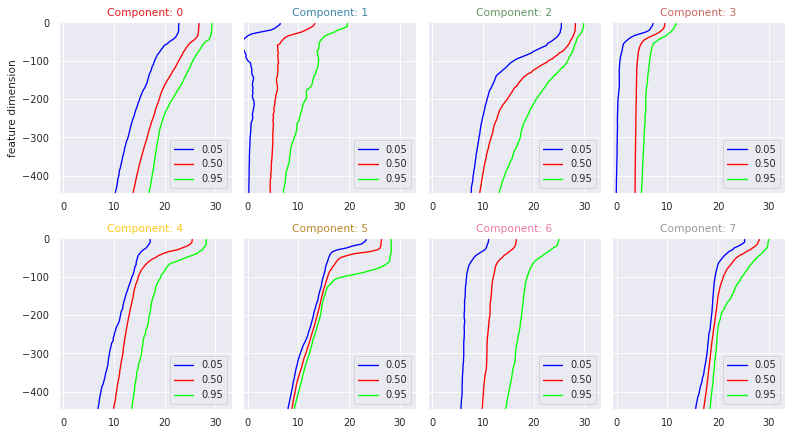

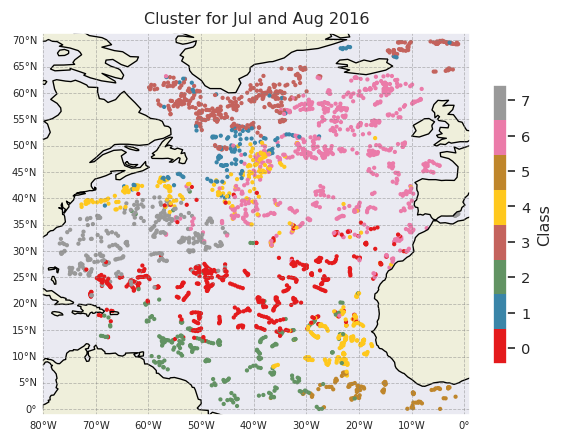

2017
We selected 2791 from 3486
<xarray.Dataset>
Dimensions:            (N_PROF: 2764, PRES_INTERPOLATED: 90)
Coordinates:
    TIME               (N_PROF) datetime64[ns] 2017-07-01T00:09:00 ... 2017-0...
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 0.0 5.0 10.0 ... 440.0 445.0
    LONGITUDE          (N_PROF) float64 -33.25 -28.73 -6.439 ... -63.11 -34.41
    LATITUDE           (N_PROF) float64 64.86 63.36 63.95 ... 53.84 29.29 61.8
  * N_PROF             (N_PROF) int64 525 516 543 31 360 195 ... 53 93 70 40 91
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 16.0 16.0 77.0 144.0 ... 120.0 18.0 30.0
    DATA_MODE          (N_PROF) object 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION          (N_PROF) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 6.903e+06 6.903e+06 ... 6.903e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float32 6.0 6.0 ... 445.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 34.956 ... 34

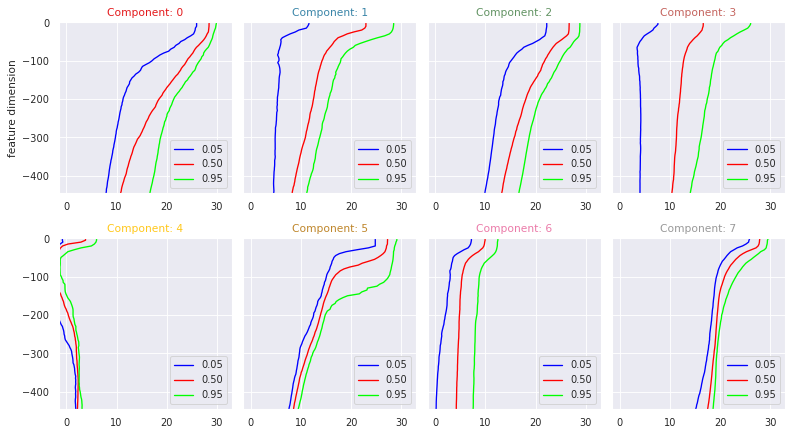

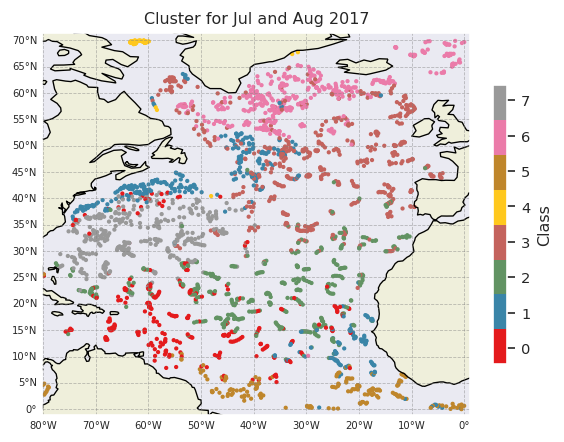

In [4]:
year=np.arange(2014,2020,1)
for i in np.arange(0,4,1):
    
    ds=xr.open_dataset(flist[i])
    y=year[i]
    print(str(y))
    
    #Check QC
    goodflags=[1,2,5,8]
    badflags=[3,4,6,7,9]
    QC=['POSITION_QC','PRES_QC','TEMP_QC','PSAL_QC','TIME_QC']
    for q in QC:
        data=np.array(ds[q])
        for flag in badflags:
            if np.any(data)==flag: 
                print('Bad data in '+str(q)+' QC flag: '+str(flag))

    # Select Delayed Time (D)
    ds2=ds.where(ds.DATA_MODE=='D',drop=True)
    print('We selected '+str(len(ds2.N_PROF))+' from '+str(len(ds.N_PROF)))

    # Vertical interp
    z=np.arange(0.,450,5.)
    ds_interp = ds2.argo.interp_std_levels(z)
    print(ds_interp)

    print('The number of profiles changed from  '+str(len(ds2.N_PROF))+ ' to '+str(len(ds_interp.N_PROF)))

    ds3=ds_interp

    # Pressure to Depth
    p=np.array(ds3.PRES)
    lat=np.array(ds3.LATITUDE)
    z=np.ones_like(p)
    nprof=np.array(ds3.N_PROF)
    #z=gsw.z_from_p(p,lat)
    for i in np.arange(0,len(nprof)):
        z[i,:]=gsw.z_from_p(p[i,:], lat[i])

    p_interp=np.array(ds3.PRES_INTERPOLATED)
    z_interp=gsw.z_from_p(p_interp, 35) # choosing a mid latitude of the basin

    # make 'clean' dataset:

    #select variables we want:
    temp=np.array(ds3.TEMP)
    sal=np.array(ds3.PSAL)
    depth_var=z
    depth=-p_interp #z_intep
    lat=np.array(ds3.LATITUDE)
    lon=np.array(ds3.LONGITUDE)
    time=np.array(ds3.TIME)
    nprof=np.array(ds3.N_PROF)
    nprof=np.arange(0,len(nprof))
    #make a net Data Array
    da=xr.Dataset(data_vars={'TEMP':(('N_PROF','DEPTH'),temp),
                            'PSAL':(('N_PROF','DEPTH'),sal),
                            'TIME':(('N_PROF'),time),
                             'LATITUDE':(('N_PROF'),lat),
                             'LONGITUDE':(('N_PROF'),lon),
                             'DEPTH_PROF':(('N_PROF','DEPTH'),depth_var)
                            },
                             coords={'N_PROF':nprof,
                                    'DEPTH':depth
                                    })
    #####################################################
    # make PCM model
    z = np.arange(0.,-450,-10.) # depth array
    pcm_features = {'temperature': z, 'salinity':z} #features that vary in function of depth
    m = pcm(K=8, features=pcm_features) # create the 'basic' model
    m

    # Fit data to the model
    features_in_ds = {'temperature': 'TEMP', 'salinity': 'PSAL'}
    features_zdim='DEPTH'
    m.fit(da, features=features_in_ds, dim=features_zdim)
    m
    da['TEMP'].attrs['feature_name'] = 'temperature'
    da['PSAL'].attrs['feature_name'] = 'salinity'
    da['DEPTH'].attrs['axis'] = 'Z'
    m.fit(da)

    # Classify the data (with predict)
    m.predict(da, features=features_in_ds, dim=features_zdim,
              inplace=True)
    da

    # Check statistical parameters of the predict
    m.predict_proba(da, features=features_in_ds, inplace=True)
    da

    # Check quantiles
    for vname in ['TEMP', 'PSAL']:
        da = da.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=vname, outname=vname + '_Q', keep_attrs=True, inplace=True)

    fig, ax = m.plot.quantile(da['TEMP_Q'], maxcols=4, figsize=(10, 8), sharey=True)
    plt.show()

    ds=da
    proj = ccrs.PlateCarree()
    subplot_kw={'projection': proj, 'extent': np.array([-80,1,-1,66]) + np.array([-0.1,+0.1,-0.1,+0.1])}
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

    kmap = m.plot.cmap()
    sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=3, c=ds['PCM_LABELS'], cmap=kmap, transform=proj, vmin=0, vmax=m.K)
    cl = m.plot.colorbar(ax=ax)

    gl = m.plot.latlongrid(ax, dx=10)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.set_title('Cluster for Jul and Aug '+str(y))
    plt.show()

We selected 5414 from 7084
<xarray.Dataset>
Dimensions:            (N_PROF: 5346, PRES_INTERPOLATED: 90)
Coordinates:
    TIME               (N_PROF) datetime64[ns] 2014-07-01T01:09:11 ... 2017-0...
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 0.0 5.0 10.0 ... 440.0 445.0
    LONGITUDE          (N_PROF) float64 -16.9 -0.454 -89.7 ... -63.11 -34.41
    LATITUDE           (N_PROF) float64 40.45 66.06 0.67 ... 53.84 29.29 61.8
  * N_PROF             (N_PROF) int64 324 583 264 269 24 196 ... 53 93 70 40 91
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 190.0 3.0 87.0 134.0 ... 120.0 18.0 30.0
    DATA_MODE          (N_PROF) object 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION          (N_PROF) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 6.9e+06 6.902e+06 ... 6.903e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float32 4.6 5.0 ... 445.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 35.85228 ... 34.91627
 

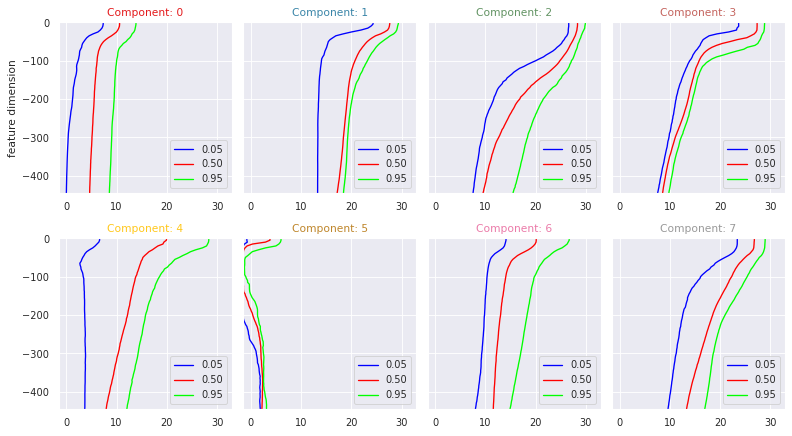

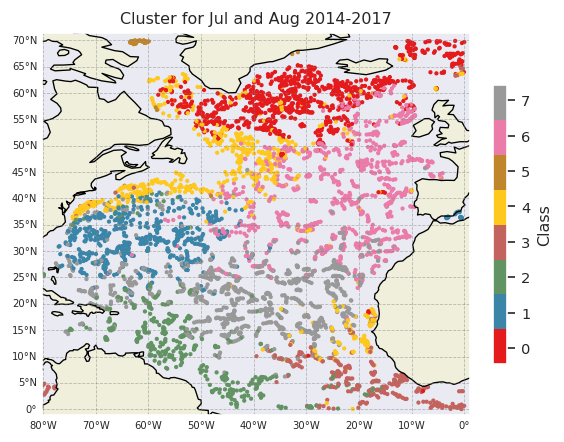

In [5]:
ds0=xr.open_dataset(flist[0])

for i in np.arange(0,4,1):
    
    ds=xr.open_dataset(flist[i])
    ds=xr.concat([ds0,ds],dim='N_PROF')
    
#Check QC
goodflags=[1,2,5,8]
badflags=[3,4,6,7,9]
QC=['POSITION_QC','PRES_QC','TEMP_QC','PSAL_QC','TIME_QC']
for q in QC:
    data=np.array(ds[q])
    for flag in badflags:
        if np.any(data)==flag: 
            print('Bad data in '+str(q)+' QC flag: '+str(flag))
            
# Select Delayed Time (D)
ds2=ds.where(ds.DATA_MODE=='D',drop=True)
print('We selected '+str(len(ds2.N_PROF))+' from '+str(len(ds.N_PROF)))

# Vertical interp
z=np.arange(0.,450,5.)
ds_interp = ds2.argo.interp_std_levels(z)
print(ds_interp)

print('The number of profiles changed from  '+str(len(ds2.N_PROF))+ ' to '+str(len(ds_interp.N_PROF)))

ds3=ds_interp

# Pressure to Depth
p=np.array(ds3.PRES)
lat=np.array(ds3.LATITUDE)
z=np.ones_like(p)
nprof=np.array(ds3.N_PROF)
#z=gsw.z_from_p(p,lat)
for i in np.arange(0,len(nprof)):
    z[i,:]=gsw.z_from_p(p[i,:], lat[i])

p_interp=np.array(ds3.PRES_INTERPOLATED)
z_interp=gsw.z_from_p(p_interp, 35) # choosing a mid latitude of the basin

# make 'clean' dataset:

#select variables we want:
temp=np.array(ds3.TEMP)
sal=np.array(ds3.PSAL)
depth_var=z
depth=-p_interp #z_intep
lat=np.array(ds3.LATITUDE)
lon=np.array(ds3.LONGITUDE)
time=np.array(ds3.TIME)
nprof=np.array(ds3.N_PROF)
nprof=np.arange(0,len(nprof))
#make a net Data Array
da=xr.Dataset(data_vars={'TEMP':(('N_PROF','DEPTH'),temp),
                        'PSAL':(('N_PROF','DEPTH'),sal),
                        'TIME':(('N_PROF'),time),
                         'LATITUDE':(('N_PROF'),lat),
                         'LONGITUDE':(('N_PROF'),lon),
                         'DEPTH_PROF':(('N_PROF','DEPTH'),depth_var)
                        },
                         coords={'N_PROF':nprof,
                                'DEPTH':depth
                                })
#####################################################
# make PCM model
z = np.arange(0.,-450,-10.) # depth array
pcm_features = {'temperature': z, 'salinity':z} #features that vary in function of depth
m = pcm(K=8, features=pcm_features) # create the 'basic' model
m

# Fit data to the model
features_in_ds = {'temperature': 'TEMP', 'salinity': 'PSAL'}
features_zdim='DEPTH'
m.fit(da, features=features_in_ds, dim=features_zdim)
m
da['TEMP'].attrs['feature_name'] = 'temperature'
da['PSAL'].attrs['feature_name'] = 'salinity'
da['DEPTH'].attrs['axis'] = 'Z'
m.fit(da)

# Classify the data (with predict)
m.predict(da, features=features_in_ds, dim=features_zdim,
          inplace=True)
da

# Check statistical parameters of the predict
m.predict_proba(da, features=features_in_ds, inplace=True)
da

# Check quantiles
for vname in ['TEMP', 'PSAL']:
    da = da.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=vname, outname=vname + '_Q', keep_attrs=True, inplace=True)

fig, ax = m.plot.quantile(da['TEMP_Q'], maxcols=4, figsize=(10, 8), sharey=True)
plt.show()

ds=da
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([-80,1,-1,66]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

kmap = m.plot.cmap()
sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=3, c=ds['PCM_LABELS'], cmap=kmap, transform=proj, vmin=0, vmax=m.K)
cl = m.plot.colorbar(ax=ax)

gl = m.plot.latlongrid(ax, dx=10)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.set_title('Cluster for Jul and Aug 2014-2017')
plt.show()

In [6]:
ds_summer=ds

# Winter

In [7]:
path='/home/jovyan/ohw20-proj-pyxpcm/data'
fname=get_prefix_filelist(path,prefix='winter')
fname
flist=[None]*len(fname)

for i,f in enumerate(fname):
    flist[i]=str(path)+'/'+str(f)
flist

['/home/jovyan/ohw20-proj-pyxpcm/data/winter2014.nc',
 '/home/jovyan/ohw20-proj-pyxpcm/data/winter2015.nc',
 '/home/jovyan/ohw20-proj-pyxpcm/data/winter2016.nc',
 '/home/jovyan/ohw20-proj-pyxpcm/data/winter2017.nc',
 '/home/jovyan/ohw20-proj-pyxpcm/data/winter2018.nc',
 '/home/jovyan/ohw20-proj-pyxpcm/data/winter2019.nc']

2014
We selected 2285 from 3141
<xarray.Dataset>
Dimensions:            (N_PROF: 2274, PRES_INTERPOLATED: 90)
Coordinates:
    TIME               (N_PROF) datetime64[ns] 2014-01-01T00:32:00 ... 2014-0...
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 0.0 5.0 10.0 ... 440.0 445.0
    LONGITUDE          (N_PROF) float64 -20.17 -38.55 -38.31 ... -31.98 -11.7
    LATITUDE           (N_PROF) float64 50.34 27.32 62.69 ... 29.2 33.91 45.06
  * N_PROF             (N_PROF) int64 91 361 314 346 317 ... 369 41 414 8 359
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 170.0 106.0 96.0 ... 52.0 96.0 62.0
    DATA_MODE          (N_PROF) object 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION          (N_PROF) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 4.901e+06 6.901e+06 ... 6.901e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float32 6.5 6.5 ... 445.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 35.36283 ... 35.59...

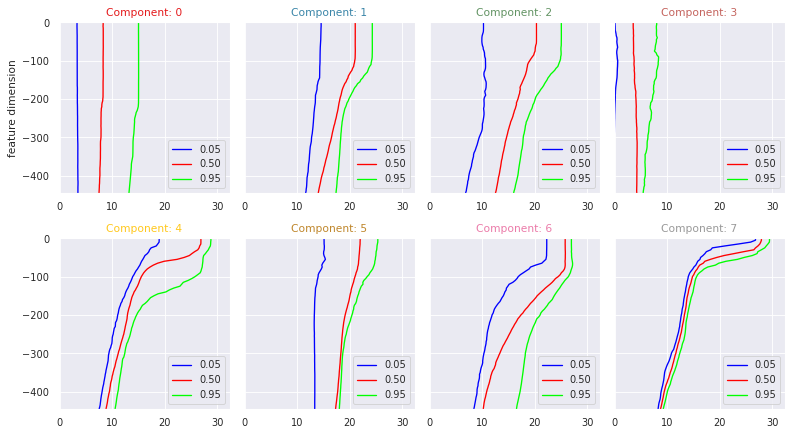

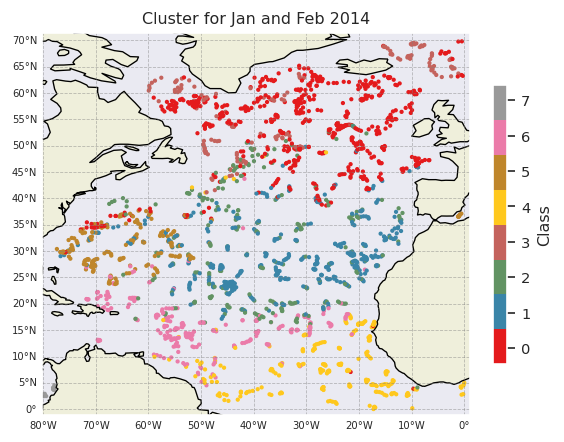

2015
We selected 2434 from 3381
<xarray.Dataset>
Dimensions:            (N_PROF: 2424, PRES_INTERPOLATED: 90)
Coordinates:
    TIME               (N_PROF) datetime64[ns] 2015-01-01T00:52:56 ... 2015-0...
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 0.0 5.0 10.0 ... 440.0 445.0
    LONGITUDE          (N_PROF) float64 -54.28 -12.0 -18.97 ... -23.65 -51.73
    LATITUDE           (N_PROF) float64 15.81 69.86 36.3 ... 56.07 25.44 21.62
  * N_PROF             (N_PROF) int64 157 545 56 253 278 ... 69 459 8 407 116
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 47.0 18.0 82.0 165.0 ... 130.0 82.0 78.0
    DATA_MODE          (N_PROF) object 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION          (N_PROF) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 4.902e+06 6.902e+06 ... 4.901e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float32 1.16 5.0 ... 445.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 35.778 ... 36.0

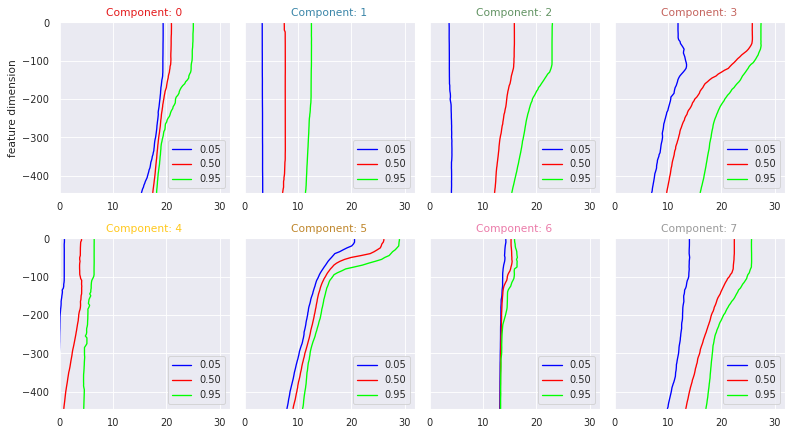

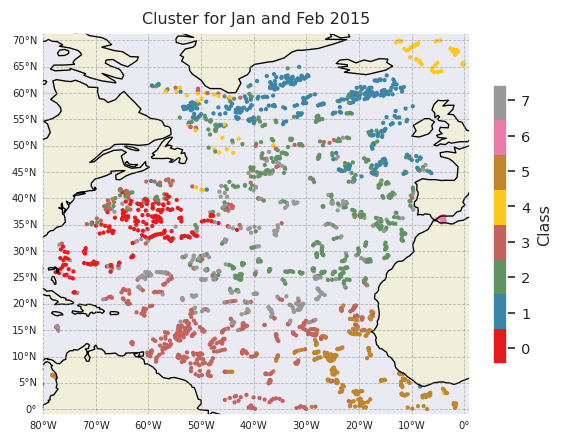

2016
We selected 2758 from 3666
<xarray.Dataset>
Dimensions:            (N_PROF: 2746, PRES_INTERPOLATED: 90)
Coordinates:
    TIME               (N_PROF) datetime64[ns] 2016-01-01T04:31:15 ... 2016-0...
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 0.0 5.0 10.0 ... 440.0 445.0
    LONGITUDE          (N_PROF) float64 -6.002 -49.42 -38.37 ... -43.51 -58.26
    LATITUDE           (N_PROF) float64 3.919 41.76 56.83 ... 53.35 54.0 36.59
  * N_PROF             (N_PROF) int64 352 202 339 577 164 ... 395 267 387 190
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 191.0 4.0 169.0 ... 179.0 136.0 101.0
    DATA_MODE          (N_PROF) object 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION          (N_PROF) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 6.901e+06 4.902e+06 ... 4.902e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float32 4.2 5.0 ... 445.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 34.726 ... 36.5170

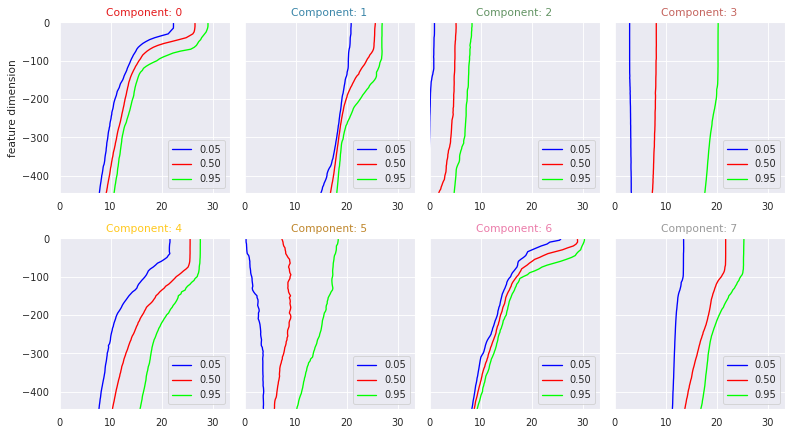

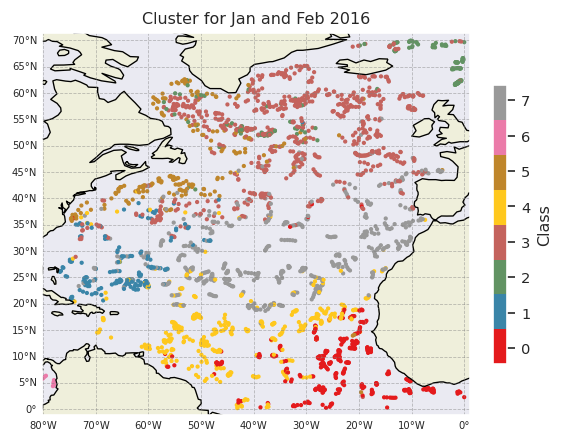

2017
We selected 2659 from 3402
<xarray.Dataset>
Dimensions:            (N_PROF: 2637, PRES_INTERPOLATED: 90)
Coordinates:
    TIME               (N_PROF) datetime64[ns] 2017-01-01 ... 2017-02-28T23:4...
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 0.0 5.0 10.0 ... 440.0 445.0
    LONGITUDE          (N_PROF) float64 -29.58 -20.32 -56.12 ... -31.61 -17.0
    LATITUDE           (N_PROF) float64 65.08 58.38 42.62 ... 57.92 57.07 46.26
  * N_PROF             (N_PROF) int64 506 408 65 369 2 ... 297 463 381 410 284
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 17.0 92.0 11.0 39.0 ... 101.0 23.0 171.0
    DATA_MODE          (N_PROF) object 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION          (N_PROF) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 6.902e+06 6.901e+06 ... 6.901e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float32 3.0 5.0 ... 445.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 34.98 ... 35.4

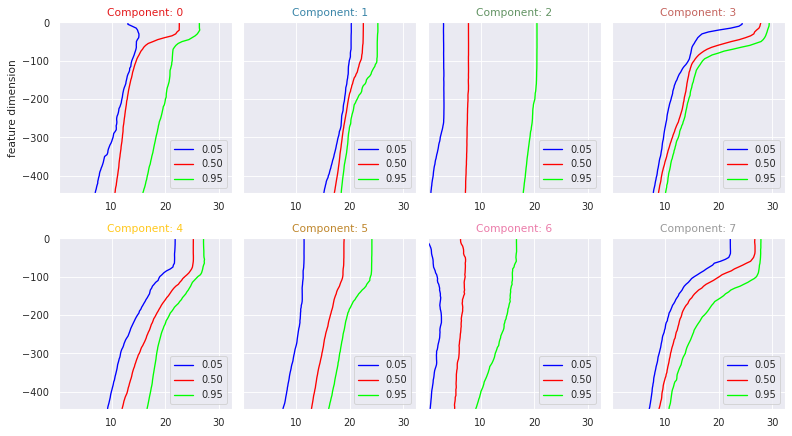

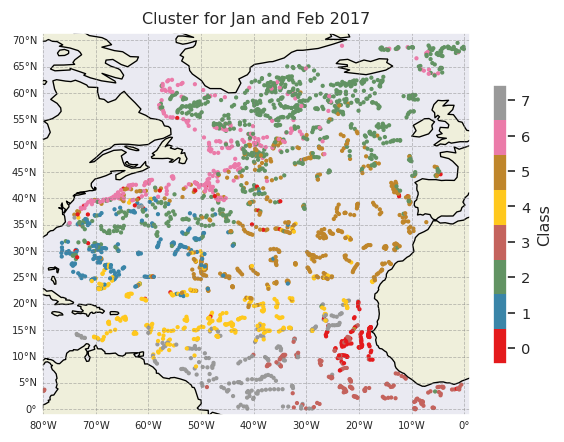

In [8]:
year=np.arange(2014,2020,1)
for i in np.arange(0,4,1):
    
    ds=xr.open_dataset(flist[i])
    y=year[i]
    print(str(y))
    
    #Check QC
    goodflags=[1,2,5,8]
    badflags=[3,4,6,7,9]
    QC=['POSITION_QC','PRES_QC','TEMP_QC','PSAL_QC','TIME_QC']
    for q in QC:
        data=np.array(ds[q])
        for flag in badflags:
            if np.any(data)==flag: 
                print('Bad data in '+str(q)+' QC flag: '+str(flag))

    # Select Delayed Time (D)
    ds2=ds.where(ds.DATA_MODE=='D',drop=True)
    print('We selected '+str(len(ds2.N_PROF))+' from '+str(len(ds.N_PROF)))

    # Vertical interp
    z=np.arange(0.,450,5.)
    ds_interp = ds2.argo.interp_std_levels(z)
    print(ds_interp)

    print('The number of profiles changed from  '+str(len(ds2.N_PROF))+ ' to '+str(len(ds_interp.N_PROF)))

    ds3=ds_interp

    # Pressure to Depth
    p=np.array(ds3.PRES)
    lat=np.array(ds3.LATITUDE)
    z=np.ones_like(p)
    nprof=np.array(ds3.N_PROF)
    #z=gsw.z_from_p(p,lat)
    for i in np.arange(0,len(nprof)):
        z[i,:]=gsw.z_from_p(p[i,:], lat[i])

    p_interp=np.array(ds3.PRES_INTERPOLATED)
    z_interp=gsw.z_from_p(p_interp, 35) # choosing a mid latitude of the basin

    # make 'clean' dataset:

    #select variables we want:
    temp=np.array(ds3.TEMP)
    sal=np.array(ds3.PSAL)
    depth_var=z
    depth=-p_interp #z_intep
    lat=np.array(ds3.LATITUDE)
    lon=np.array(ds3.LONGITUDE)
    time=np.array(ds3.TIME)
    nprof=np.array(ds3.N_PROF)
    nprof=np.arange(0,len(nprof))
    #make a net Data Array
    da=xr.Dataset(data_vars={'TEMP':(('N_PROF','DEPTH'),temp),
                            'PSAL':(('N_PROF','DEPTH'),sal),
                            'TIME':(('N_PROF'),time),
                             'LATITUDE':(('N_PROF'),lat),
                             'LONGITUDE':(('N_PROF'),lon),
                             'DEPTH_PROF':(('N_PROF','DEPTH'),depth_var)
                            },
                             coords={'N_PROF':nprof,
                                    'DEPTH':depth
                                    })
    #####################################################
    # make PCM model
    z = np.arange(0.,-450,-10.) # depth array
    pcm_features = {'temperature': z, 'salinity':z} #features that vary in function of depth
    m = pcm(K=8, features=pcm_features) # create the 'basic' model
    m

    # Fit data to the model
    features_in_ds = {'temperature': 'TEMP', 'salinity': 'PSAL'}
    features_zdim='DEPTH'
    m.fit(da, features=features_in_ds, dim=features_zdim)
    m
    da['TEMP'].attrs['feature_name'] = 'temperature'
    da['PSAL'].attrs['feature_name'] = 'salinity'
    da['DEPTH'].attrs['axis'] = 'Z'
    m.fit(da)

    # Classify the data (with predict)
    m.predict(da, features=features_in_ds, dim=features_zdim,
              inplace=True)
    da

    # Check statistical parameters of the predict
    m.predict_proba(da, features=features_in_ds, inplace=True)
    da

    # Check quantiles
    for vname in ['TEMP', 'PSAL']:
        da = da.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=vname, outname=vname + '_Q', keep_attrs=True, inplace=True)

    fig, ax = m.plot.quantile(da['TEMP_Q'], maxcols=4, figsize=(10, 8), sharey=True)
    plt.show()

    ds=da
    proj = ccrs.PlateCarree()
    subplot_kw={'projection': proj, 'extent': np.array([-80,1,-1,66]) + np.array([-0.1,+0.1,-0.1,+0.1])}
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

    kmap = m.plot.cmap()
    sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=3, c=ds['PCM_LABELS'], cmap=kmap, transform=proj, vmin=0, vmax=m.K)
    cl = m.plot.colorbar(ax=ax)

    gl = m.plot.latlongrid(ax, dx=10)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.set_title('Cluster for Jan and Feb '+str(y))
    plt.show()

We selected 4944 from 6543
<xarray.Dataset>
Dimensions:            (N_PROF: 4911, PRES_INTERPOLATED: 90)
Coordinates:
    TIME               (N_PROF) datetime64[ns] 2014-01-01T00:32:00 ... 2017-0...
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 0.0 5.0 10.0 ... 440.0 445.0
    LONGITUDE          (N_PROF) float64 -20.17 -38.55 -38.31 ... -31.61 -17.0
    LATITUDE           (N_PROF) float64 50.34 27.32 62.69 ... 57.92 57.07 46.26
  * N_PROF             (N_PROF) int64 91 361 314 346 317 ... 297 463 381 410 284
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 170.0 106.0 96.0 ... 101.0 23.0 171.0
    DATA_MODE          (N_PROF) object 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION          (N_PROF) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 4.901e+06 6.901e+06 ... 6.901e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float32 6.5 6.5 ... 445.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 35.36283 ... 35.41..

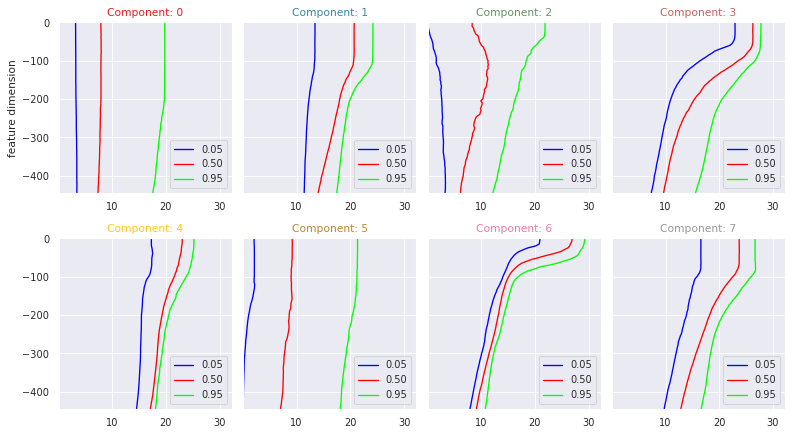

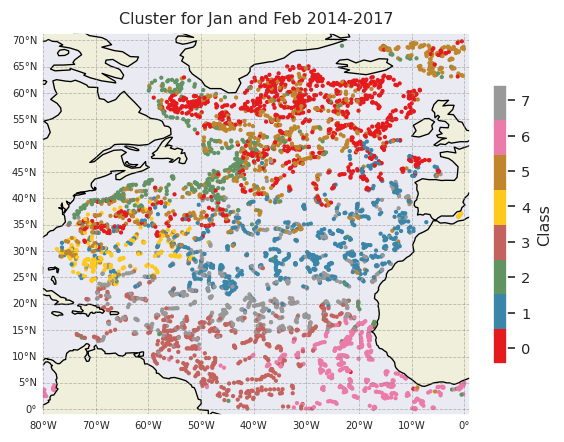

In [9]:
ds0=xr.open_dataset(flist[0])

for i in np.arange(0,4,1):
    
    ds=xr.open_dataset(flist[i])
    ds=xr.concat([ds0,ds],dim='N_PROF')
    
#Check QC
goodflags=[1,2,5,8]
badflags=[3,4,6,7,9]
QC=['POSITION_QC','PRES_QC','TEMP_QC','PSAL_QC','TIME_QC']
for q in QC:
    data=np.array(ds[q])
    for flag in badflags:
        if np.any(data)==flag: 
            print('Bad data in '+str(q)+' QC flag: '+str(flag))
            
# Select Delayed Time (D)
ds2=ds.where(ds.DATA_MODE=='D',drop=True)
print('We selected '+str(len(ds2.N_PROF))+' from '+str(len(ds.N_PROF)))

# Vertical interp
z=np.arange(0.,450,5.)
ds_interp = ds2.argo.interp_std_levels(z)
print(ds_interp)

print('The number of profiles changed from  '+str(len(ds2.N_PROF))+ ' to '+str(len(ds_interp.N_PROF)))

ds3=ds_interp

# Pressure to Depth
p=np.array(ds3.PRES)
lat=np.array(ds3.LATITUDE)
z=np.ones_like(p)
nprof=np.array(ds3.N_PROF)
#z=gsw.z_from_p(p,lat)
for i in np.arange(0,len(nprof)):
    z[i,:]=gsw.z_from_p(p[i,:], lat[i])

p_interp=np.array(ds3.PRES_INTERPOLATED)
z_interp=gsw.z_from_p(p_interp, 35) # choosing a mid latitude of the basin

# make 'clean' dataset:

#select variables we want:
temp=np.array(ds3.TEMP)
sal=np.array(ds3.PSAL)
depth_var=z
depth=-p_interp #z_intep
lat=np.array(ds3.LATITUDE)
lon=np.array(ds3.LONGITUDE)
time=np.array(ds3.TIME)
nprof=np.array(ds3.N_PROF)
nprof=np.arange(0,len(nprof))
#make a net Data Array
da=xr.Dataset(data_vars={'TEMP':(('N_PROF','DEPTH'),temp),
                        'PSAL':(('N_PROF','DEPTH'),sal),
                        'TIME':(('N_PROF'),time),
                         'LATITUDE':(('N_PROF'),lat),
                         'LONGITUDE':(('N_PROF'),lon),
                         'DEPTH_PROF':(('N_PROF','DEPTH'),depth_var)
                        },
                         coords={'N_PROF':nprof,
                                'DEPTH':depth
                                })
#####################################################
# make PCM model
z = np.arange(0.,-450,-10.) # depth array
pcm_features = {'temperature': z, 'salinity':z} #features that vary in function of depth
m = pcm(K=8, features=pcm_features) # create the 'basic' model
m

# Fit data to the model
features_in_ds = {'temperature': 'TEMP', 'salinity': 'PSAL'}
features_zdim='DEPTH'
m.fit(da, features=features_in_ds, dim=features_zdim)
m
da['TEMP'].attrs['feature_name'] = 'temperature'
da['PSAL'].attrs['feature_name'] = 'salinity'
da['DEPTH'].attrs['axis'] = 'Z'
m.fit(da)

# Classify the data (with predict)
m.predict(da, features=features_in_ds, dim=features_zdim,
          inplace=True)
da

# Check statistical parameters of the predict
m.predict_proba(da, features=features_in_ds, inplace=True)
da

# Check quantiles
for vname in ['TEMP', 'PSAL']:
    da = da.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=vname, outname=vname + '_Q', keep_attrs=True, inplace=True)

fig, ax = m.plot.quantile(da['TEMP_Q'], maxcols=4, figsize=(10, 8), sharey=True)
plt.show()

ds=da
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([-80,1,-1,66]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

kmap = m.plot.cmap()
sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=3, c=ds['PCM_LABELS'], cmap=kmap, transform=proj, vmin=0, vmax=m.K)
cl = m.plot.colorbar(ax=ax)

gl = m.plot.latlongrid(ax, dx=10)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.set_title('Cluster for Jan and Feb 2014-2017')
plt.show()

In [10]:
ds_winter=ds

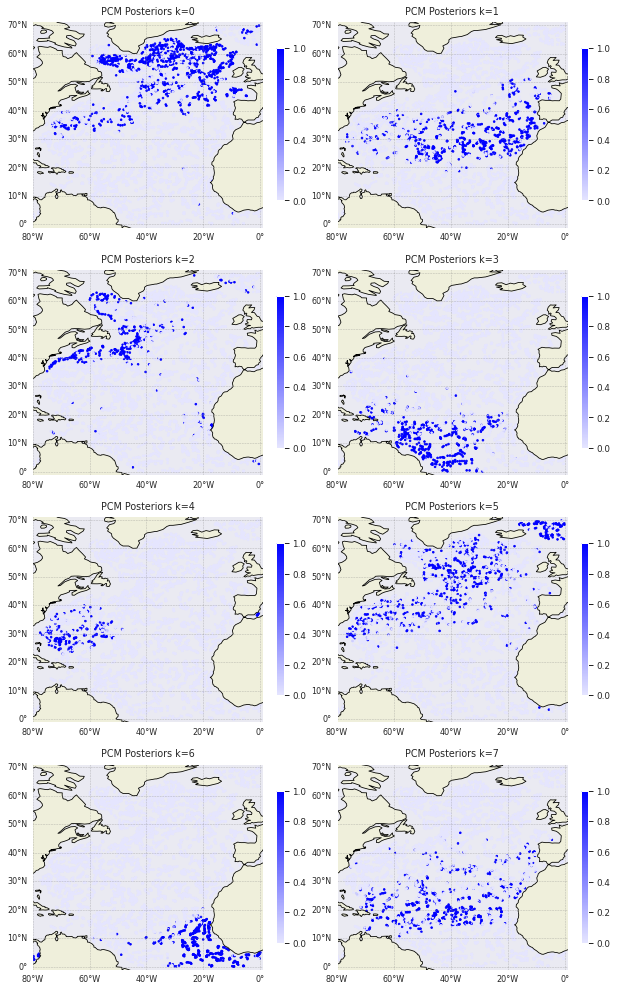

In [11]:
cmap = sns.light_palette("blue", as_cmap=True)
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([-80,1,-1,66]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = m.plot.subplots(figsize=(10,22), maxcols=2, subplot_kw=subplot_kw)

for k in m:
    sc = ax[k].scatter(ds['LONGITUDE'], ds['LATITUDE'], s=3, c=ds['PCM_POST'].sel(pcm_class=k),
                       cmap=cmap, transform=proj, vmin=0, vmax=1)
    cl = plt.colorbar(sc, ax=ax[k], fraction=0.03)
    gl = m.plot.latlongrid(ax[k], fontsize=8, dx=20, dy=10)
    ax[k].add_feature(cfeature.LAND)
    ax[k].add_feature(cfeature.COASTLINE)
    ax[k].set_title('PCM Posteriors k=%i' % k)

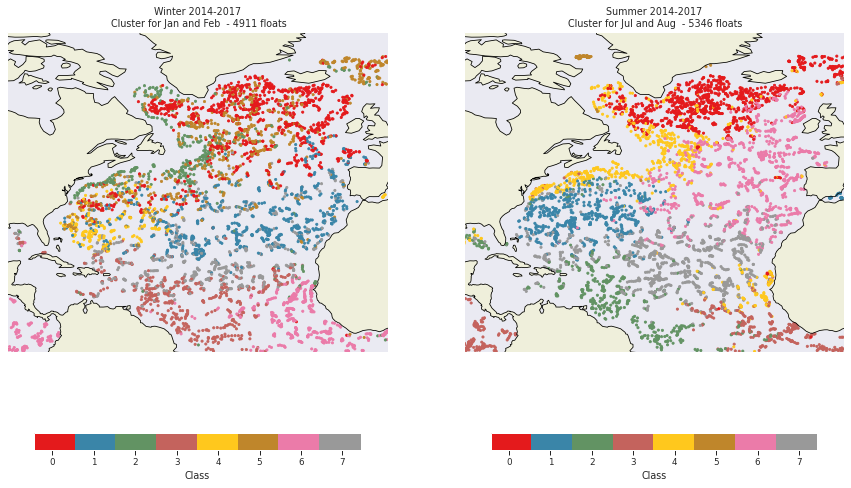

In [13]:
llon=-90;rlon=0
ulat=70;llat=0 

fig=plt.figure(figsize=(15,10))

ds=ds_winter
ax = plt.subplot(121, projection=ccrs.PlateCarree()
                 #Mercator()
                 )
ax.set_extent([llon,rlon,llat,ulat])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=5, c=ds['PCM_LABELS'], 
                cmap=kmap, transform=proj, vmin=0, vmax=m.K)

cl = m.plot.colorbar(ax=ax,orientation='horizontal')
plt.title('Winter 2014-2017\n Cluster for Jan and Feb  - '+str(len(np.array(ds.N_PROF)))+' floats')


ds=ds_summer
ax = plt.subplot(122, projection=ccrs.PlateCarree()
                 #Mercator()
                 )
ax.set_extent([llon,rlon,llat,ulat])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=5, c=ds['PCM_LABELS'], 
                cmap=kmap, transform=proj, vmin=0, vmax=m.K)
cl = m.plot.colorbar(ax=ax,orientation='horizontal')
plt.title('Summer 2014-2017\n Cluster for Jul and Aug  - '+str(len(np.array(ds.N_PROF)))+' floats')

plt.show()

# Test different depth integrations

Integrating form 0 to 1000 every 5m

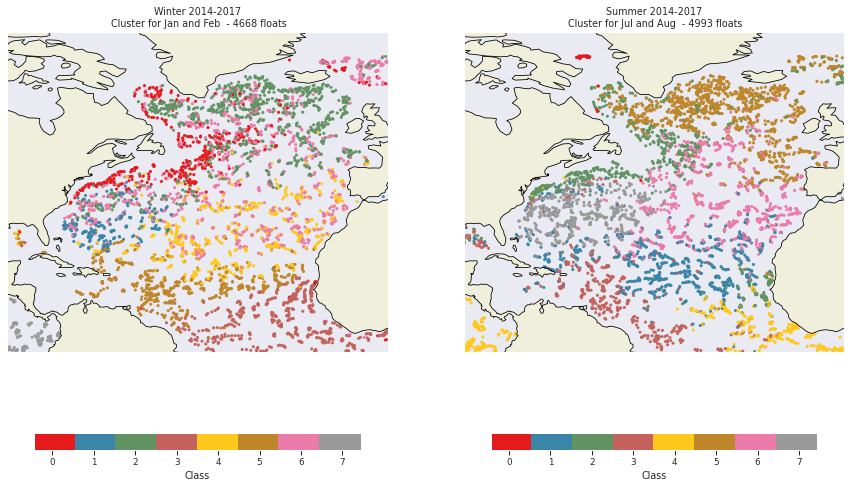

In [14]:
path='/home/jovyan/ohw20-proj-pyxpcm/data'

########### Summer 
fname=get_prefix_filelist(path,prefix='summer')
fname
flist=[None]*len(fname)

for i,f in enumerate(fname):
    flist[i]=str(path)+'/'+str(f)
flist

ds0=xr.open_dataset(flist[0])

for i in np.arange(0,4,1):
    
    ds=xr.open_dataset(flist[i])
    ds=xr.concat([ds0,ds],dim='N_PROF')
    
#Check QC
goodflags=[1,2,5,8]
badflags=[3,4,6,7,9]
QC=['POSITION_QC','PRES_QC','TEMP_QC','PSAL_QC','TIME_QC']
for q in QC:
    data=np.array(ds[q])
    for flag in badflags:
        if np.any(data)==flag: 
            print('Bad data in '+str(q)+' QC flag: '+str(flag))
            
# Select Delayed Time (D)
ds2=ds.where(ds.DATA_MODE=='D',drop=True)
#print('We selected '+str(len(ds2.N_PROF))+' from '+str(len(ds.N_PROF)))

# Vertical interp
z=np.arange(0.,1000,5.)
ds_interp = ds2.argo.interp_std_levels(z)
#print(ds_interp)

#print('The number of profiles changed from  '+str(len(ds2.N_PROF))+ ' to '+str(len(ds_interp.N_PROF)))

ds3=ds_interp

# Pressure to Depth
p=np.array(ds3.PRES)
lat=np.array(ds3.LATITUDE)
z=np.ones_like(p)
nprof=np.array(ds3.N_PROF)
#z=gsw.z_from_p(p,lat)
for i in np.arange(0,len(nprof)):
    z[i,:]=gsw.z_from_p(p[i,:], lat[i])

p_interp=np.array(ds3.PRES_INTERPOLATED)
z_interp=gsw.z_from_p(p_interp, 35) # choosing a mid latitude of the basin

# make 'clean' dataset:

#select variables we want:
temp=np.array(ds3.TEMP)
sal=np.array(ds3.PSAL)
depth_var=z
depth=-p_interp #z_intep
lat=np.array(ds3.LATITUDE)
lon=np.array(ds3.LONGITUDE)
time=np.array(ds3.TIME)
nprof=np.array(ds3.N_PROF)
nprof=np.arange(0,len(nprof))
#make a net Data Array
da=xr.Dataset(data_vars={'TEMP':(('N_PROF','DEPTH'),temp),
                        'PSAL':(('N_PROF','DEPTH'),sal),
                        'TIME':(('N_PROF'),time),
                         'LATITUDE':(('N_PROF'),lat),
                         'LONGITUDE':(('N_PROF'),lon),
                         'DEPTH_PROF':(('N_PROF','DEPTH'),depth_var)
                        },
                         coords={'N_PROF':nprof,
                                'DEPTH':depth
                                })
#####################################################
# make PCM model
z = np.arange(0.,-450,-10.) # depth array
pcm_features = {'temperature': z, 'salinity':z} #features that vary in function of depth
m = pcm(K=8, features=pcm_features) # create the 'basic' model
m

# Fit data to the model
features_in_ds = {'temperature': 'TEMP', 'salinity': 'PSAL'}
features_zdim='DEPTH'
m.fit(da, features=features_in_ds, dim=features_zdim)
m
da['TEMP'].attrs['feature_name'] = 'temperature'
da['PSAL'].attrs['feature_name'] = 'salinity'
da['DEPTH'].attrs['axis'] = 'Z'
m.fit(da)

# Classify the data (with predict)
m.predict(da, features=features_in_ds, dim=features_zdim,
          inplace=True)
da

# Check statistical parameters of the predict
m.predict_proba(da, features=features_in_ds, inplace=True)
da

# Check quantiles
for vname in ['TEMP', 'PSAL']:
    da = da.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=vname, outname=vname + '_Q', keep_attrs=True, inplace=True)

ds_summer_deep=da
################################################
################################################
########### Winter 
fname=get_prefix_filelist(path,prefix='winter')
fname
flist=[None]*len(fname)

for i,f in enumerate(fname):
    flist[i]=str(path)+'/'+str(f)
flist

ds0=xr.open_dataset(flist[0])

for i in np.arange(0,4,1):
    
    ds=xr.open_dataset(flist[i])
    ds=xr.concat([ds0,ds],dim='N_PROF')
    
#Check QC
goodflags=[1,2,5,8]
badflags=[3,4,6,7,9]
QC=['POSITION_QC','PRES_QC','TEMP_QC','PSAL_QC','TIME_QC']
for q in QC:
    data=np.array(ds[q])
    for flag in badflags:
        if np.any(data)==flag: 
            print('Bad data in '+str(q)+' QC flag: '+str(flag))
            
# Select Delayed Time (D)
ds2=ds.where(ds.DATA_MODE=='D',drop=True)
#print('We selected '+str(len(ds2.N_PROF))+' from '+str(len(ds.N_PROF)))

# Vertical interp
z=np.arange(0.,1000,5.)
ds_interp = ds2.argo.interp_std_levels(z)
#print(ds_interp)

#print('The number of profiles changed from  '+str(len(ds2.N_PROF))+ ' to '+str(len(ds_interp.N_PROF)))

ds3=ds_interp

# Pressure to Depth
p=np.array(ds3.PRES)
lat=np.array(ds3.LATITUDE)
z=np.ones_like(p)
nprof=np.array(ds3.N_PROF)
#z=gsw.z_from_p(p,lat)
for i in np.arange(0,len(nprof)):
    z[i,:]=gsw.z_from_p(p[i,:], lat[i])

p_interp=np.array(ds3.PRES_INTERPOLATED)
z_interp=gsw.z_from_p(p_interp, 35) # choosing a mid latitude of the basin

# make 'clean' dataset:

#select variables we want:
temp=np.array(ds3.TEMP)
sal=np.array(ds3.PSAL)
depth_var=z
depth=-p_interp #z_intep
lat=np.array(ds3.LATITUDE)
lon=np.array(ds3.LONGITUDE)
time=np.array(ds3.TIME)
nprof=np.array(ds3.N_PROF)
nprof=np.arange(0,len(nprof))
#make a net Data Array
da=xr.Dataset(data_vars={'TEMP':(('N_PROF','DEPTH'),temp),
                        'PSAL':(('N_PROF','DEPTH'),sal),
                        'TIME':(('N_PROF'),time),
                         'LATITUDE':(('N_PROF'),lat),
                         'LONGITUDE':(('N_PROF'),lon),
                         'DEPTH_PROF':(('N_PROF','DEPTH'),depth_var)
                        },
                         coords={'N_PROF':nprof,
                                'DEPTH':depth
                                })
#####################################################
# make PCM model
z = np.arange(0.,-450,-10.) # depth array
pcm_features = {'temperature': z, 'salinity':z} #features that vary in function of depth
m = pcm(K=8, features=pcm_features) # create the 'basic' model
m

# Fit data to the model
features_in_ds = {'temperature': 'TEMP', 'salinity': 'PSAL'}
features_zdim='DEPTH'
m.fit(da, features=features_in_ds, dim=features_zdim)
m
da['TEMP'].attrs['feature_name'] = 'temperature'
da['PSAL'].attrs['feature_name'] = 'salinity'
da['DEPTH'].attrs['axis'] = 'Z'
m.fit(da)

# Classify the data (with predict)
m.predict(da, features=features_in_ds, dim=features_zdim,
          inplace=True)
da

# Check statistical parameters of the predict
m.predict_proba(da, features=features_in_ds, inplace=True)
da

# Check quantiles
for vname in ['TEMP', 'PSAL']:
    da = da.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=vname, outname=vname + '_Q', keep_attrs=True, inplace=True)

ds_winter_deep=da
#################################### PLOT
fig=plt.figure(figsize=(15,10))

ds=ds_winter_deep
ax = plt.subplot(121, projection=ccrs.PlateCarree()
                 #Mercator()
                 )
ax.set_extent([llon,rlon,llat,ulat])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=5, c=ds['PCM_LABELS'], 
                cmap=kmap, transform=proj, vmin=0, vmax=m.K)

cl = m.plot.colorbar(ax=ax,orientation='horizontal')
plt.title('Winter 2014-2017\n Cluster for Jan and Feb  - '+str(len(np.array(ds.N_PROF)))+' floats')


ds=ds_summer_deep
ax = plt.subplot(122, projection=ccrs.PlateCarree()
                 #Mercator()
                 )
ax.set_extent([llon,rlon,llat,ulat])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=5, c=ds['PCM_LABELS'], 
                cmap=kmap, transform=proj, vmin=0, vmax=m.K)
cl = m.plot.colorbar(ax=ax,orientation='horizontal')
plt.title('Summer 2014-2017\n Cluster for Jul and Aug  - '+str(len(np.array(ds.N_PROF)))+' floats')

plt.show()

# k=5

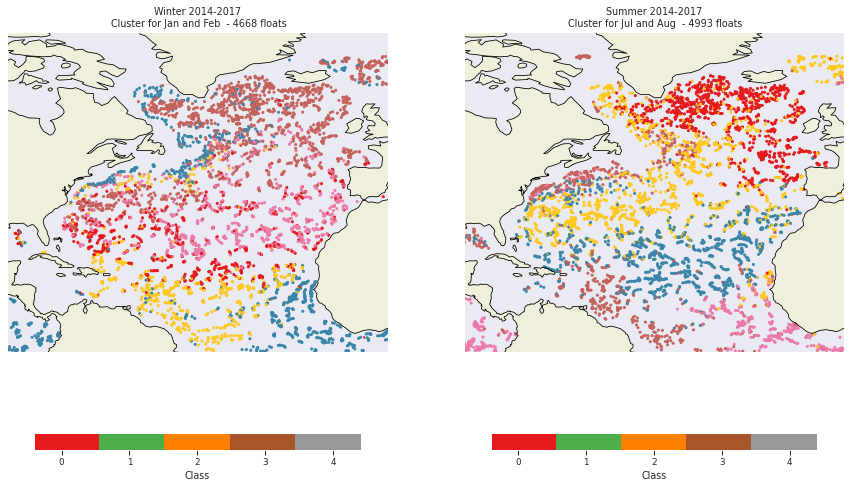

In [15]:
path='/home/jovyan/ohw20-proj-pyxpcm/data'

########### Summer 
fname=get_prefix_filelist(path,prefix='summer')
fname
flist=[None]*len(fname)

for i,f in enumerate(fname):
    flist[i]=str(path)+'/'+str(f)
flist

ds0=xr.open_dataset(flist[0])

for i in np.arange(0,4,1):
    
    ds=xr.open_dataset(flist[i])
    ds=xr.concat([ds0,ds],dim='N_PROF')
    
#Check QC
goodflags=[1,2,5,8]
badflags=[3,4,6,7,9]
QC=['POSITION_QC','PRES_QC','TEMP_QC','PSAL_QC','TIME_QC']
for q in QC:
    data=np.array(ds[q])
    for flag in badflags:
        if np.any(data)==flag: 
            print('Bad data in '+str(q)+' QC flag: '+str(flag))
            
# Select Delayed Time (D)
ds2=ds.where(ds.DATA_MODE=='D',drop=True)
#print('We selected '+str(len(ds2.N_PROF))+' from '+str(len(ds.N_PROF)))

# Vertical interp
z=np.arange(0.,1000,5.)
ds_interp = ds2.argo.interp_std_levels(z)
#print(ds_interp)

#print('The number of profiles changed from  '+str(len(ds2.N_PROF))+ ' to '+str(len(ds_interp.N_PROF)))

ds3=ds_interp

# Pressure to Depth
p=np.array(ds3.PRES)
lat=np.array(ds3.LATITUDE)
z=np.ones_like(p)
nprof=np.array(ds3.N_PROF)
#z=gsw.z_from_p(p,lat)
for i in np.arange(0,len(nprof)):
    z[i,:]=gsw.z_from_p(p[i,:], lat[i])

p_interp=np.array(ds3.PRES_INTERPOLATED)
z_interp=gsw.z_from_p(p_interp, 35) # choosing a mid latitude of the basin

# make 'clean' dataset:

#select variables we want:
temp=np.array(ds3.TEMP)
sal=np.array(ds3.PSAL)
depth_var=z
depth=-p_interp #z_intep
lat=np.array(ds3.LATITUDE)
lon=np.array(ds3.LONGITUDE)
time=np.array(ds3.TIME)
nprof=np.array(ds3.N_PROF)
nprof=np.arange(0,len(nprof))
#make a net Data Array
da=xr.Dataset(data_vars={'TEMP':(('N_PROF','DEPTH'),temp),
                        'PSAL':(('N_PROF','DEPTH'),sal),
                        'TIME':(('N_PROF'),time),
                         'LATITUDE':(('N_PROF'),lat),
                         'LONGITUDE':(('N_PROF'),lon),
                         'DEPTH_PROF':(('N_PROF','DEPTH'),depth_var)
                        },
                         coords={'N_PROF':nprof,
                                'DEPTH':depth
                                })
#####################################################
# make PCM model
z = np.arange(0.,-450,-10.) # depth array
pcm_features = {'temperature': z, 'salinity':z} #features that vary in function of depth
m = pcm(K=5, features=pcm_features) # create the 'basic' model
m

# Fit data to the model
features_in_ds = {'temperature': 'TEMP', 'salinity': 'PSAL'}
features_zdim='DEPTH'
m.fit(da, features=features_in_ds, dim=features_zdim)
m
da['TEMP'].attrs['feature_name'] = 'temperature'
da['PSAL'].attrs['feature_name'] = 'salinity'
da['DEPTH'].attrs['axis'] = 'Z'
m.fit(da)

# Classify the data (with predict)
m.predict(da, features=features_in_ds, dim=features_zdim,
          inplace=True)
da

# Check statistical parameters of the predict
m.predict_proba(da, features=features_in_ds, inplace=True)
da

# Check quantiles
for vname in ['TEMP', 'PSAL']:
    da = da.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=vname, outname=vname + '_Q', keep_attrs=True, inplace=True)

ds_summer_deep=da
################################################
################################################
########### Winter 
fname=get_prefix_filelist(path,prefix='winter')
fname
flist=[None]*len(fname)

for i,f in enumerate(fname):
    flist[i]=str(path)+'/'+str(f)
flist

ds0=xr.open_dataset(flist[0])

for i in np.arange(0,4,1):
    
    ds=xr.open_dataset(flist[i])
    ds=xr.concat([ds0,ds],dim='N_PROF')
    
#Check QC
goodflags=[1,2,5,8]
badflags=[3,4,6,7,9]
QC=['POSITION_QC','PRES_QC','TEMP_QC','PSAL_QC','TIME_QC']
for q in QC:
    data=np.array(ds[q])
    for flag in badflags:
        if np.any(data)==flag: 
            print('Bad data in '+str(q)+' QC flag: '+str(flag))
            
# Select Delayed Time (D)
ds2=ds.where(ds.DATA_MODE=='D',drop=True)
#print('We selected '+str(len(ds2.N_PROF))+' from '+str(len(ds.N_PROF)))

# Vertical interp
z=np.arange(0.,1000,5.)
ds_interp = ds2.argo.interp_std_levels(z)
#print(ds_interp)

#print('The number of profiles changed from  '+str(len(ds2.N_PROF))+ ' to '+str(len(ds_interp.N_PROF)))

ds3=ds_interp

# Pressure to Depth
p=np.array(ds3.PRES)
lat=np.array(ds3.LATITUDE)
z=np.ones_like(p)
nprof=np.array(ds3.N_PROF)
#z=gsw.z_from_p(p,lat)
for i in np.arange(0,len(nprof)):
    z[i,:]=gsw.z_from_p(p[i,:], lat[i])

p_interp=np.array(ds3.PRES_INTERPOLATED)
z_interp=gsw.z_from_p(p_interp, 35) # choosing a mid latitude of the basin

# make 'clean' dataset:

#select variables we want:
temp=np.array(ds3.TEMP)
sal=np.array(ds3.PSAL)
depth_var=z
depth=-p_interp #z_intep
lat=np.array(ds3.LATITUDE)
lon=np.array(ds3.LONGITUDE)
time=np.array(ds3.TIME)
nprof=np.array(ds3.N_PROF)
nprof=np.arange(0,len(nprof))
#make a net Data Array
da=xr.Dataset(data_vars={'TEMP':(('N_PROF','DEPTH'),temp),
                        'PSAL':(('N_PROF','DEPTH'),sal),
                        'TIME':(('N_PROF'),time),
                         'LATITUDE':(('N_PROF'),lat),
                         'LONGITUDE':(('N_PROF'),lon),
                         'DEPTH_PROF':(('N_PROF','DEPTH'),depth_var)
                        },
                         coords={'N_PROF':nprof,
                                'DEPTH':depth
                                })
#####################################################
# make PCM model
z = np.arange(0.,-450,-10.) # depth array
pcm_features = {'temperature': z, 'salinity':z} #features that vary in function of depth
m = pcm(K=5, features=pcm_features) # create the 'basic' model
m

# Fit data to the model
features_in_ds = {'temperature': 'TEMP', 'salinity': 'PSAL'}
features_zdim='DEPTH'
m.fit(da, features=features_in_ds, dim=features_zdim)
m
da['TEMP'].attrs['feature_name'] = 'temperature'
da['PSAL'].attrs['feature_name'] = 'salinity'
da['DEPTH'].attrs['axis'] = 'Z'
m.fit(da)

# Classify the data (with predict)
m.predict(da, features=features_in_ds, dim=features_zdim,
          inplace=True)
da

# Check statistical parameters of the predict
m.predict_proba(da, features=features_in_ds, inplace=True)
da

# Check quantiles
for vname in ['TEMP', 'PSAL']:
    da = da.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=vname, outname=vname + '_Q', keep_attrs=True, inplace=True)

ds_winter_deep=da
#################################### PLOT
fig=plt.figure(figsize=(15,10))

ds=ds_winter_deep
ax = plt.subplot(121, projection=ccrs.PlateCarree()
                 #Mercator()
                 )
ax.set_extent([llon,rlon,llat,ulat])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=5, c=ds['PCM_LABELS'], 
                cmap=kmap, transform=proj, vmin=0, vmax=m.K)

cl = m.plot.colorbar(ax=ax,orientation='horizontal')
plt.title('Winter 2014-2017\n Cluster for Jan and Feb  - '+str(len(np.array(ds.N_PROF)))+' floats')


ds=ds_summer_deep
ax = plt.subplot(122, projection=ccrs.PlateCarree()
                 #Mercator()
                 )
ax.set_extent([llon,rlon,llat,ulat])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=5, c=ds['PCM_LABELS'], 
                cmap=kmap, transform=proj, vmin=0, vmax=m.K)
cl = m.plot.colorbar(ax=ax,orientation='horizontal')
plt.title('Summer 2014-2017\n Cluster for Jul and Aug  - '+str(len(np.array(ds.N_PROF)))+' floats')

plt.show()

# k=6

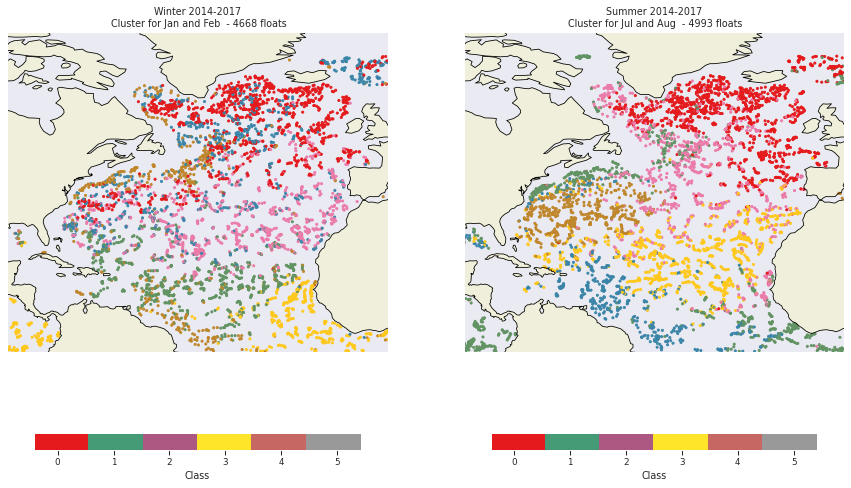

In [16]:
path='/home/jovyan/ohw20-proj-pyxpcm/data'
kk=6
########### Summer 
fname=get_prefix_filelist(path,prefix='summer')
fname
flist=[None]*len(fname)

for i,f in enumerate(fname):
    flist[i]=str(path)+'/'+str(f)
flist

ds0=xr.open_dataset(flist[0])

for i in np.arange(0,4,1):
    
    ds=xr.open_dataset(flist[i])
    ds=xr.concat([ds0,ds],dim='N_PROF')
    
#Check QC
goodflags=[1,2,5,8]
badflags=[3,4,6,7,9]
QC=['POSITION_QC','PRES_QC','TEMP_QC','PSAL_QC','TIME_QC']
for q in QC:
    data=np.array(ds[q])
    for flag in badflags:
        if np.any(data)==flag: 
            print('Bad data in '+str(q)+' QC flag: '+str(flag))
            
# Select Delayed Time (D)
ds2=ds.where(ds.DATA_MODE=='D',drop=True)
#print('We selected '+str(len(ds2.N_PROF))+' from '+str(len(ds.N_PROF)))

# Vertical interp
z=np.arange(0.,1000,5.)
ds_interp = ds2.argo.interp_std_levels(z)
#print(ds_interp)

#print('The number of profiles changed from  '+str(len(ds2.N_PROF))+ ' to '+str(len(ds_interp.N_PROF)))

ds3=ds_interp

# Pressure to Depth
p=np.array(ds3.PRES)
lat=np.array(ds3.LATITUDE)
z=np.ones_like(p)
nprof=np.array(ds3.N_PROF)
#z=gsw.z_from_p(p,lat)
for i in np.arange(0,len(nprof)):
    z[i,:]=gsw.z_from_p(p[i,:], lat[i])

p_interp=np.array(ds3.PRES_INTERPOLATED)
z_interp=gsw.z_from_p(p_interp, 35) # choosing a mid latitude of the basin

# make 'clean' dataset:

#select variables we want:
temp=np.array(ds3.TEMP)
sal=np.array(ds3.PSAL)
depth_var=z
depth=-p_interp #z_intep
lat=np.array(ds3.LATITUDE)
lon=np.array(ds3.LONGITUDE)
time=np.array(ds3.TIME)
nprof=np.array(ds3.N_PROF)
nprof=np.arange(0,len(nprof))
#make a net Data Array
da=xr.Dataset(data_vars={'TEMP':(('N_PROF','DEPTH'),temp),
                        'PSAL':(('N_PROF','DEPTH'),sal),
                        'TIME':(('N_PROF'),time),
                         'LATITUDE':(('N_PROF'),lat),
                         'LONGITUDE':(('N_PROF'),lon),
                         'DEPTH_PROF':(('N_PROF','DEPTH'),depth_var)
                        },
                         coords={'N_PROF':nprof,
                                'DEPTH':depth
                                })
#####################################################
# make PCM model
z = np.arange(0.,-450,-10.) # depth array
pcm_features = {'temperature': z, 'salinity':z} #features that vary in function of depth
m = pcm(K=kk, features=pcm_features) # create the 'basic' model
m

# Fit data to the model
features_in_ds = {'temperature': 'TEMP', 'salinity': 'PSAL'}
features_zdim='DEPTH'
m.fit(da, features=features_in_ds, dim=features_zdim)
m
da['TEMP'].attrs['feature_name'] = 'temperature'
da['PSAL'].attrs['feature_name'] = 'salinity'
da['DEPTH'].attrs['axis'] = 'Z'
m.fit(da)

# Classify the data (with predict)
m.predict(da, features=features_in_ds, dim=features_zdim,
          inplace=True)
da

# Check statistical parameters of the predict
m.predict_proba(da, features=features_in_ds, inplace=True)
da

# Check quantiles
for vname in ['TEMP', 'PSAL']:
    da = da.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=vname, outname=vname + '_Q', keep_attrs=True, inplace=True)

ds_summer_deep=da
################################################
################################################
########### Winter 
fname=get_prefix_filelist(path,prefix='winter')
fname
flist=[None]*len(fname)

for i,f in enumerate(fname):
    flist[i]=str(path)+'/'+str(f)
flist

ds0=xr.open_dataset(flist[0])

for i in np.arange(0,4,1):
    
    ds=xr.open_dataset(flist[i])
    ds=xr.concat([ds0,ds],dim='N_PROF')
    
#Check QC
goodflags=[1,2,5,8]
badflags=[3,4,6,7,9]
QC=['POSITION_QC','PRES_QC','TEMP_QC','PSAL_QC','TIME_QC']
for q in QC:
    data=np.array(ds[q])
    for flag in badflags:
        if np.any(data)==flag: 
            print('Bad data in '+str(q)+' QC flag: '+str(flag))
            
# Select Delayed Time (D)
ds2=ds.where(ds.DATA_MODE=='D',drop=True)
#print('We selected '+str(len(ds2.N_PROF))+' from '+str(len(ds.N_PROF)))

# Vertical interp
z=np.arange(0.,1000,5.)
ds_interp = ds2.argo.interp_std_levels(z)
#print(ds_interp)

#print('The number of profiles changed from  '+str(len(ds2.N_PROF))+ ' to '+str(len(ds_interp.N_PROF)))

ds3=ds_interp

# Pressure to Depth
p=np.array(ds3.PRES)
lat=np.array(ds3.LATITUDE)
z=np.ones_like(p)
nprof=np.array(ds3.N_PROF)
#z=gsw.z_from_p(p,lat)
for i in np.arange(0,len(nprof)):
    z[i,:]=gsw.z_from_p(p[i,:], lat[i])

p_interp=np.array(ds3.PRES_INTERPOLATED)
z_interp=gsw.z_from_p(p_interp, 35) # choosing a mid latitude of the basin

# make 'clean' dataset:

#select variables we want:
temp=np.array(ds3.TEMP)
sal=np.array(ds3.PSAL)
depth_var=z
depth=-p_interp #z_intep
lat=np.array(ds3.LATITUDE)
lon=np.array(ds3.LONGITUDE)
time=np.array(ds3.TIME)
nprof=np.array(ds3.N_PROF)
nprof=np.arange(0,len(nprof))
#make a net Data Array
da=xr.Dataset(data_vars={'TEMP':(('N_PROF','DEPTH'),temp),
                        'PSAL':(('N_PROF','DEPTH'),sal),
                        'TIME':(('N_PROF'),time),
                         'LATITUDE':(('N_PROF'),lat),
                         'LONGITUDE':(('N_PROF'),lon),
                         'DEPTH_PROF':(('N_PROF','DEPTH'),depth_var)
                        },
                         coords={'N_PROF':nprof,
                                'DEPTH':depth
                                })
#####################################################
# make PCM model
z = np.arange(0.,-450,-10.) # depth array
pcm_features = {'temperature': z, 'salinity':z} #features that vary in function of depth
m = pcm(K=kk, features=pcm_features) # create the 'basic' model
m

# Fit data to the model
features_in_ds = {'temperature': 'TEMP', 'salinity': 'PSAL'}
features_zdim='DEPTH'
m.fit(da, features=features_in_ds, dim=features_zdim)
m
da['TEMP'].attrs['feature_name'] = 'temperature'
da['PSAL'].attrs['feature_name'] = 'salinity'
da['DEPTH'].attrs['axis'] = 'Z'
m.fit(da)

# Classify the data (with predict)
m.predict(da, features=features_in_ds, dim=features_zdim,
          inplace=True)
da

# Check statistical parameters of the predict
m.predict_proba(da, features=features_in_ds, inplace=True)
da

# Check quantiles
for vname in ['TEMP', 'PSAL']:
    da = da.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=vname, outname=vname + '_Q', keep_attrs=True, inplace=True)

ds_winter_deep=da
#################################### PLOT
fig=plt.figure(figsize=(15,10))

ds=ds_winter_deep
ax = plt.subplot(121, projection=ccrs.PlateCarree()
                 #Mercator()
                 )
ax.set_extent([llon,rlon,llat,ulat])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=5, c=ds['PCM_LABELS'], 
                cmap=kmap, transform=proj, vmin=0, vmax=m.K)

cl = m.plot.colorbar(ax=ax,orientation='horizontal')
plt.title('Winter 2014-2017\n Cluster for Jan and Feb  - '+str(len(np.array(ds.N_PROF)))+' floats')


ds=ds_summer_deep
ax = plt.subplot(122, projection=ccrs.PlateCarree()
                 #Mercator()
                 )
ax.set_extent([llon,rlon,llat,ulat])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=5, c=ds['PCM_LABELS'], 
                cmap=kmap, transform=proj, vmin=0, vmax=m.K)
cl = m.plot.colorbar(ax=ax,orientation='horizontal')
plt.title('Summer 2014-2017\n Cluster for Jul and Aug  - '+str(len(np.array(ds.N_PROF)))+' floats')

plt.show()